Data Visualisation  Course Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_excel("/content/All_Translated_Student_Data_With_Gender.xlsx")

In [ ]:
df.head(10)

,Student Name,Registration Number,English,Maths,Marathi,History,Geography,Science,Total Marks,Result,Gender,Race/Ethnicity
0,Yeole Yash Sanjay,853,66,84,64,59,53,65,391,1,Male,group B
1,Patil Soumya Sandip,854,74,91,62,85,99,81,492,1,Female,group C
2,Khatkar Sahil Vinay,855,46,99,94,66,40,41,386,1,Male,group B
3,Dongre Sanket Neetik,856,55,66,46,55,42,43,307,1,Male,group A
4,Patil Aditya Dattatray,857,83,70,100,67,90,69,479,1,Male,group C
5,Ambekar Kshitij Aman,858,53,93,45,95,66,57,409,1,Male,group B
6,Dongre Pranjal Bhushan,861,74,57,99,57,70,55,412,1,Female,group B
7,Patil Sanskriti Samarth,863,83,61,79,57,95,60,435,1,Female,group B
8,Yeole Vedika Vikram,864,73,67,71,92,48,61,412,1,Female,group D
9,Kasare Smita Satish,865,94,95,64,66,80,42,441,1,Female,group B


In [ ]:
df.isnull().sum()

,0
Student Name,0
Registration Number,0
English,0
Maths,0
Marathi,0
History,0
Geography,0
Science,0
Total Marks,0
Result,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Student Name         110 non-null    object
 1   Registration Number  110 non-null    int64 
 2   English              110 non-null    int64 
 3   Maths                110 non-null    int64 
 4   Marathi              110 non-null    int64 
 5   History              110 non-null    int64 
 6   Geography            110 non-null    int64 
 7   Science              110 non-null    int64 
 8   Total Marks          110 non-null    int64 
 9   Result               110 non-null    int64 
 10  Gender               110 non-null    object
 11  Race/Ethnicity       110 non-null    object
dtypes: int64(9), object(3)
memory usage: 10.4+ KB


In [ ]:
df.describe()

,Registration Number,English,Maths,Marathi,History,Geography,Science,Total Marks,Result
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,959.472727,67.945455,70.009091,68.018182,70.618182,68.236364,66.754545,411.581818,0.936364
std,84.086206,16.690291,18.417431,17.924911,18.434601,19.965993,17.654787,56.455289,0.245221
min,853.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,273.000000,0.000000
25%,892.500000,54.000000,55.250000,51.250000,56.000000,49.250000,52.000000,380.500000,1.000000
50%,930.500000,68.500000,68.000000,67.000000,70.000000,68.000000,63.000000,415.000000,1.000000
75%,1003.500000,81.750000,86.500000,82.000000,86.000000,87.000000,81.000000,456.750000,1.000000
max,1121.000000,99.000000,100.000000,100.000000,100.000000,100.000000,99.000000,517.000000,1.000000


In [ ]:
df.dtypes

,0
Student Name,object
Registration Number,int64
English,int64
Maths,int64
Marathi,int64
History,int64
Geography,int64
Science,int64
Total Marks,int64
Result,int64


In [ ]:
# Create average score feature
df['average_score'] = (df['English'] + df['Maths'] + df['Marathi']+df['History'] + df['Geography'] + df['Science']) / 6

# Create pass/fail label (target variable)
pass_threshold = 60  # Assuming 60 is passing grade
df['passed'] = (df['average_score'] >= pass_threshold).astype(int)


In [ ]:
# Create performance categories
def performance_category(avg_score):
    if avg_score >= 85: return 'excellent'
    elif avg_score >= 70: return 'good'
    elif avg_score >= 60: return 'average'
    else: return 'poor'

df['performance_category'] = df['average_score'].apply(performance_category)

In [ ]:
from itertools import combinations
subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']

# Create subject difference features
for subj1, subj2 in combinations(subjects, 2):
    df[f'{subj1}_minus_{subj2}'] = df[subj1] - df[subj2]

    df['Computed_Total_Score'] = df[subjects].sum(axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Label encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Race/Ethnicity']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Feature scaling for numerical features
# Use subject columns and recomputed total
numerical_cols = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science', 'Computed_Total_Score']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show scaled data
print(df.head())


             Student Name  Registration Number   English     Maths   Marathi  \
0       Yeole Yash Sanjay                  853 -0.117096  0.763133 -0.225193   
1     Patil Soumya Sandip                  854  0.364419  1.144947 -0.337281   
2     Khatkar Sahil Vinay                  855 -1.320881  1.581306  1.456115   
3    Dongre Sanket Neetik                  856 -0.779178 -0.218675 -1.233978   
4  Patil Aditya Dattatray                  857  0.906122 -0.000496  1.792377   

    History  Geography   Science  Total Marks  Result  ...  \
0 -0.633122  -0.766608 -0.099836          391       1  ...   
1  0.783724   1.547853  0.810582          492       1  ...   
2 -0.251664  -1.420695 -1.465462          386       1  ...   
3 -0.851098  -1.320067 -1.351660          307       1  ...   
4 -0.197169   1.095024  0.127769          479       1  ...   

   Marathi_minus_History  Marathi_minus_Geography  Marathi_minus_Science  \
0                      5                       11                     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess dataset
df = pd.read_excel("/content/All_Translated_Student_Data_With_Gender.xlsx")

# Subject columns
subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']

# Compute total score
df['Computed_Total_Score'] = df[subjects].sum(axis=1)

# Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Race/Ethnicity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical columns
scaler = StandardScaler()
df[subjects + ['Computed_Total_Score']] = scaler.fit_transform(df[subjects + ['Computed_Total_Score']])

# Prepare features and target
X = df.drop(['Result', 'Total Marks', 'Student Name', 'Registration Number'], axis=1)
y = df['Result']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import joblib

# Load dataset
df = pd.read_excel("All_Translated_Student_Data_With_Gender.xlsx")

# Calculate target: average_score
df['average_score'] = (df['Maths'] + df['Science'] + df['English']) / 3

# Drop irrelevant columns
df = df.drop(columns=['Student Name', 'Registration Number', 'Roll No.'], errors='ignore')

# Set target and features
target = 'average_score'
y = df[target]
X = df.drop(columns=[target])

# Encode categorical features
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Track the best model
best_model = None
best_score = -1
best_model_name = ""

print("\n📊 Model Evaluation for Student Performance Prediction:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} ➤ R² Score: {round(r2, 3)}, MAE: {round(mae, 2)}")

    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, f"best_student_model_{best_model_name.replace(' ', '_')}.pkl")
print(f"\n✅ Best model '{best_model_name}' saved as 'best_student_model_{best_model_name.replace(' ', '_')}.pkl'")



📊 Model Evaluation for Student Performance Prediction:

Linear Regression ➤ R² Score: 1.0, MAE: 0.0
Random Forest ➤ R² Score: 0.851, MAE: 3.21
XGBoost ➤ R² Score: 0.852, MAE: 3.1
Gradient Boosting ➤ R² Score: 0.95, MAE: 1.97

✅ Best model 'Linear Regression' saved as 'best_student_model_Linear_Regression.pkl'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

# Load dataset
df = pd.read_excel("All_Translated_Student_Data_With_Gender.xlsx")

# Add average_score as target for regression
df['average_score'] = (df['Maths'] + df['Science'] + df['English']) / 3

# ========== Common Preprocessing ==========
def preprocess_and_split(df, target_column, is_classification=True):
    df = df.copy()

    # Drop identifiers
    df = df.drop(columns=['Student Name', 'Registration Number'], errors='ignore')

    # Encode target
    y = df[target_column]
    if is_classification and y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
    else:
        y = df[target_column]

    X = df.drop(columns=[target_column], errors='ignore')
    X = pd.get_dummies(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========== REGRESSION ==========
X_train_r, X_test_r, y_train_r, y_test_r = preprocess_and_split(df, 'average_score', is_classification=False)

regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

print("\n--- Regression Models (Predicting average_score) ---")
for name, model in regression_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    print(f"{name} R² Score:", round(r2_score(y_test_r, y_pred), 3))
    print(f"{name} MAE:", round(mean_absolute_error(y_test_r, y_pred), 2))
    print()



--- Regression Models (Predicting average_score) ---
Linear Regression R² Score: 1.0
Linear Regression MAE: 0.0

Random Forest R² Score: 0.851
Random Forest MAE: 3.21

XGBoost R² Score: 0.852
XGBoost MAE: 3.1

Gradient Boosting R² Score: 0.95
Gradient Boosting MAE: 1.97




--- Regression Models (Predicting average_score) ---
Linear Regression R² Score: 1.0
Linear Regression MAE: 0.0

Random Forest R² Score: 0.851
Random Forest MAE: 3.21

XGBoost R² Score: 0.852
XGBoost MAE: 3.1

Gradient Boosting R² Score: 0.95
Gradient Boosting MAE: 1.97



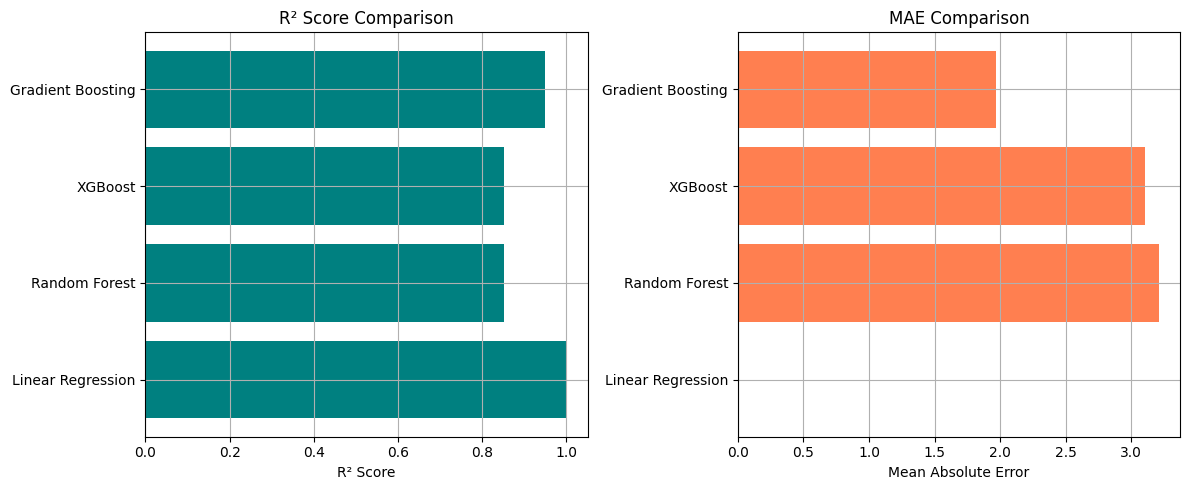

In [ ]:
import matplotlib.pyplot as plt

# Store results
model_names = []
r2_scores = []
mae_scores = []

print("\n--- Regression Models (Predicting average_score) ---")
for name, model in regression_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)

    r2 = r2_score(y_test_r, y_pred)
    mae = mean_absolute_error(y_test_r, y_pred)

    model_names.append(name)
    r2_scores.append(r2)
    mae_scores.append(mae)

    print(f"{name} R² Score: {round(r2, 3)}")
    print(f"{name} MAE: {round(mae, 2)}\n")

# Plotting
plt.figure(figsize=(12, 5))

# R² Score
plt.subplot(1, 2, 1)
plt.barh(model_names, r2_scores, color='teal')
plt.title('R² Score Comparison')
plt.xlabel('R² Score')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.barh(model_names, mae_scores, color='coral')
plt.title('MAE Comparison')
plt.xlabel('Mean Absolute Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import defaultdict
import joblib

# Load dataset
df = pd.read_excel("All_Translated_Student_Data_With_Gender.xlsx")

# Feature Engineering
def prepare_student_data(df):
    df = df.copy()
    subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']
    df['Average'] = df[subjects].mean(axis=1)
    df['Passed'] = (df['Average'] >= 60).astype(int)
    return df, subjects

df, subjects = prepare_student_data(df)

# Clustering based on subject scores
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(df[subjects])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores_scaled)

# Save clustering model and scaler
joblib.dump(kmeans, 'student_cluster_model.pkl')
joblib.dump(scaler, 'student_score_scaler.pkl')

# Cluster Label Mapping (for interpretation)
cluster_labels = {
    0: "High Performers",
    1: "Average Performers",
    2: "Needs Improvement"
}

def generate_cluster_based_study_plan(student_row, subjects, cluster_labels):
    cluster = student_row['Cluster']
    performance_group = cluster_labels[cluster]

    study_plan = {
        'student_info': {
            'name': student_row['Student Name'],
            'gender': student_row['Gender'],
            'cluster_group': performance_group,
            'average_score': student_row['Average']
        },
        'weak_subjects': [],
        'recommendations': defaultdict(list)
    }

    # Identify weak subjects
    for subject in subjects:
        if student_row[subject] < 60:
            study_plan['weak_subjects'].append(subject)

    # Group-level recommendations
    if performance_group == "Needs Improvement":
        study_plan['recommendations']['general'].extend([
            "Daily focused study schedule (2+ hours/day)",
            "Parental monitoring of study routines",
            "Weekly improvement tracking and mentoring"
        ])
    elif performance_group == "Average Performers":
        study_plan['recommendations']['general'].extend([
            "Focus on weak areas",
            "Create a subject-specific revision timetable",
            "Bi-weekly test practice"
        ])
    else:  # High Performers
        study_plan['recommendations']['general'].extend([
            "Continue consistent efforts",
            "Engage in peer learning",
            "Practice olympiad-level problems"
        ])

    # Subject-specific recommendations
    for subject in study_plan['weak_subjects']:
        study_plan['recommendations'][subject].extend([
            f"Daily {subject} revision (30 minutes)",
            f"Concept clarification sessions for {subject}",
            f"Use visual tools/apps to aid {subject} learning"
        ])

    study_plan['recommendations'] = dict(study_plan['recommendations'])
    return study_plan

def print_study_plan(plan):
    print("\n" + "="*60)
    print("PERSONALIZED STUDY PLAN".center(60))
    print("="*60)

    info = plan['student_info']
    print(f"Name: {info['name']} | Gender: {info['gender']}")
    print(f"Performance Group: {info['cluster_group']}")
    print(f"Average Score: {info['average_score']:.2f}")

    print("\nIDENTIFIED WEAK SUBJECTS:")
    if plan['weak_subjects']:
        for subj in plan['weak_subjects']:
            print(f"- {subj}")
    else:
        print("- None")

    print("\nRECOMMENDATIONS:")
    for category, recs in plan['recommendations'].items():
        print(f"\n{category.upper()}:")
        for i, rec in enumerate(recs, 1):
            print(f"  {i}. {rec}")

    print("\n" + "="*60)

# Example usage with a single student
sample_student = df.iloc[0]
study_plan = generate_cluster_based_study_plan(sample_student, subjects, cluster_labels)
print_study_plan(study_plan)  # Display plan



                  PERSONALIZED STUDY PLAN                   
Name: Yeole Yash Sanjay | Gender: Male
Performance Group: High Performers
Average Score: 65.17

IDENTIFIED WEAK SUBJECTS:
- History
- Geography

RECOMMENDATIONS:

GENERAL:
  1. Continue consistent efforts
  2. Engage in peer learning
  3. Practice olympiad-level problems

HISTORY:
  1. Daily History revision (30 minutes)
  2. Concept clarification sessions for History
  3. Use visual tools/apps to aid History learning

GEOGRAPHY:
  1. Daily Geography revision (30 minutes)
  2. Concept clarification sessions for Geography
  3. Use visual tools/apps to aid Geography learning



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load dataset
df = pd.read_excel("/content/All_Translated_Student_Data_With_Gender.xlsx")

# Feature Engineering
def prepare_student_data(df):
    df = df.copy()
    subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']
    df['Average'] = df[subjects].mean(axis=1)
    df['Passed'] = (df['Average'] >= 60).astype(int)
    return df, subjects

df, subjects = prepare_student_data(df)

# Clustering
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(df[subjects])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores_scaled)

# Save models
joblib.dump(kmeans, 'student_cluster_model.pkl')
joblib.dump(scaler, 'student_score_scaler.pkl')

# Function to get dynamic cluster label per student
def get_cluster_label(student_row, subjects, data):
    subject_scores = student_row[subjects]
    avg_score = subject_scores.mean()
    cluster = student_row['Cluster']
    cluster_data = data[data['Cluster'] == cluster]
    cluster_avg = cluster_data[subjects].mean().mean()

    if avg_score > cluster_avg:
        return "Good Performance"
    elif avg_score < cluster_avg:
        return "Moderate Performance"
    else:
        return "Needs Improvement"

# Function to generate study plan
def generate_cluster_based_study_plan(student_row, subjects, data):
    subject_scores = student_row[subjects]
    average_score = subject_scores.mean()
    strongest_subject = subject_scores.idxmax()
    weakest_subject = subject_scores.idxmin()
    cluster = student_row['Cluster']
    cluster_data = data[data['Cluster'] == cluster]
    cluster_avg = cluster_data[subjects].mean()
    cluster_label = get_cluster_label(student_row, subjects, data)

    return {
        'name': student_row['Student Name'],
        'gender': student_row['Gender'],
        'cluster': cluster,
        'cluster_label': cluster_label,
        'average_score': average_score,
        'strongest_subject': strongest_subject,
        'weakest_subject': weakest_subject
    }

# Function to print all students in their clusters with new labels
def print_students_in_clusters(df, subjects):
    print("\n" + "="*60)
    print("ALL STUDENTS BY CLUSTER".center(60))
    print("="*60)
    for cluster_num in sorted(df['Cluster'].unique()):
        print(f"\nCluster {cluster_num} Students:")
        cluster_students = df[df['Cluster'] == cluster_num]
        for _, student in cluster_students.iterrows():
            label = get_cluster_label(student, subjects, df)
            print(f"- {student['Student Name']} ({label})")

# Print plan for a sample student
sample_student = df.iloc[0]
study_info = generate_cluster_based_study_plan(sample_student, subjects, df)

print("\n" + "="*60)
print("SAMPLE STUDENT STUDY PLAN".center(60))
print("="*60)
print(f"Name: {study_info['name']}")
print(f"Gender: {study_info['gender']}")
print(f"Cluster: {study_info['cluster']}")
print(f"Cluster Label: {study_info['cluster_label']}")
print(f"Average Score: {study_info['average_score']:.2f}")
print(f"Strongest Subject: {study_info['strongest_subject']}")
print(f"Weakest Subject: {study_info['weakest_subject']}")

# Print all students grouped by cluster
print_students_in_clusters(df, subjects)



                 SAMPLE STUDENT STUDY PLAN                  
Name: Yeole Yash Sanjay
Gender: Male
Cluster: 0
Cluster Label: Moderate Performance
Average Score: 65.17
Strongest Subject: Maths
Weakest Subject: Geography

                  ALL STUDENTS BY CLUSTER                   

Cluster 0 Students:
- Yeole Yash Sanjay (Moderate Performance)
- Khatkar Sahil Vinay (Moderate Performance)
- Ambekar Kshitij Aman (Moderate Performance)
- Yeole Vedika Vikram (Moderate Performance)
- Kasare Smita Satish (Good Performance)
- Karande Pranit Sanket (Moderate Performance)
- Patil Gayatri Vinayak (Good Performance)
- Denge Suhana Ajay (Moderate Performance)
- Kirtiraj Jayant Chandekar (Moderate Performance)
- Kumar Aniket Santosh (Moderate Performance)
- Neeraj Anurup Dattatray (Good Performance)
- Aditya Ramesh Jondhale (Good Performance)
- Shaurya Baliram Thombre (Good Performance)
- Gargi Mangesh Kale (Good Performance)
- Abhijeet Amjad Pathan (Moderate Performance)
- Harshit Tushar Patil (Mod

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load dataset
df = pd.read_excel("/content/All_Translated_Student_Data_With_Gender.xlsx")

# Feature Engineering
def prepare_student_data(df):
    df = df.copy()
    subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']
    df['Average'] = df[subjects].mean(axis=1)
    df['Passed'] = (df['Average'] >= 60).astype(int)
    return df, subjects

df, subjects = prepare_student_data(df)

# Clustering
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(df[subjects])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores_scaled)

# Save model and scaler
joblib.dump(kmeans, 'student_cluster_model.pkl')
joblib.dump(scaler, 'student_score_scaler.pkl')

# Function to determine cluster label using margin logic
def determine_cluster_label(student_avg, cluster_avg):
    if student_avg > cluster_avg:
        return "Good Performance"
    elif student_avg < cluster_avg - 5:
        return "Needs Improvement"
    else:
        return "Moderate Performance"

# Study Plan Generator
def generate_cluster_based_study_plan(student_row, subjects, data):
    subject_scores = student_row[subjects]
    average_score = subject_scores.mean()
    strongest_subject = subject_scores.idxmax()
    weakest_subject = subject_scores.idxmin()
    cluster = student_row['Cluster']
    cluster_data = data[data['Cluster'] == cluster]
    cluster_avg = cluster_data[subjects].mean().mean()  # Mean of all subject means in cluster

    cluster_label = determine_cluster_label(average_score, cluster_avg)

    return {
        'Name': student_row['Student Name'],
        'Gender': student_row['Gender'],
        'Cluster': cluster,
        'Cluster Label': cluster_label,
        'Average Score': round(average_score, 2),
        'Strongest Subject': strongest_subject,
        'Weakest Subject': weakest_subject
    }

# Print study plan for a sample student
def print_study_plan(plan):
    print("\n" + "="*60)
    print("SAMPLE STUDENT STUDY PLAN".center(60))
    print("="*60)
    print(f"Name: {plan['Name']}")
    print(f"Gender: {plan['Gender']}")
    print(f"Cluster: {plan['Cluster']}")
    print(f"Cluster Label: {plan['Cluster Label']}")
    print(f"Average Score: {plan['Average Score']}")
    print(f"Strongest Subject: {plan['Strongest Subject']}")
    print(f"Weakest Subject: {plan['Weakest Subject']}")
    print("="*60)

# Print all students grouped by cluster and labeled performance
def print_students_by_cluster_with_label(df, subjects):
    print("\n" + "="*60)
    print("STUDENTS GROUPED BY CLUSTER & PERFORMANCE".center(60))
    print("="*60)

    for cluster in sorted(df['Cluster'].unique()):
        print(f"\nCluster {cluster} Students:")
        cluster_data = df[df['Cluster'] == cluster]
        cluster_avg = cluster_data[subjects].mean().mean()

        for _, row in cluster_data.iterrows():
            student_avg = row[subjects].mean()
            label = determine_cluster_label(student_avg, cluster_avg)
            print(f"- {row['Student Name']} ({label})")

# Generate and display
sample_student = df.iloc[0]
study_plan = generate_cluster_based_study_plan(sample_student, subjects, df)
print_study_plan(study_plan)
print_students_by_cluster_with_label(df, subjects)



                 SAMPLE STUDENT STUDY PLAN                  
Name: Yeole Yash Sanjay
Gender: Male
Cluster: 0
Cluster Label: Moderate Performance
Average Score: 65.17
Strongest Subject: Maths
Weakest Subject: Geography

         STUDENTS GROUPED BY CLUSTER & PERFORMANCE          

Cluster 0 Students:
- Yeole Yash Sanjay (Moderate Performance)
- Khatkar Sahil Vinay (Needs Improvement)
- Ambekar Kshitij Aman (Moderate Performance)
- Yeole Vedika Vikram (Moderate Performance)
- Kasare Smita Satish (Good Performance)
- Karande Pranit Sanket (Needs Improvement)
- Patil Gayatri Vinayak (Good Performance)
- Denge Suhana Ajay (Needs Improvement)
- Kirtiraj Jayant Chandekar (Needs Improvement)
- Kumar Aniket Santosh (Moderate Performance)
- Neeraj Anurup Dattatray (Good Performance)
- Aditya Ramesh Jondhale (Good Performance)
- Shaurya Baliram Thombre (Good Performance)
- Gargi Mangesh Kale (Good Performance)
- Abhijeet Amjad Pathan (Moderate Performance)
- Harshit Tushar Patil (Needs Improveme

In [ ]:
def print_cluster_average_scores(data, subjects):
    print("\n" + "="*60)
    print("             CLUSTER AVERAGE SCORES")
    print("="*60)

    for cluster in sorted(data['Cluster'].unique()):
        cluster_data = data[data['Cluster'] == cluster]
        cluster_avg_score = cluster_data[subjects].mean().mean()
        print(f"Cluster {cluster}: Average Score = {cluster_avg_score:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load dataset
df = pd.read_excel("/content/All_Translated_Student_Data_With_Gender.xlsx")

# Feature Engineering
def prepare_student_data(df):
    df = df.copy()
    subjects = ['English', 'Maths', 'Marathi', 'History', 'Geography', 'Science']
    df['Average'] = df[subjects].mean(axis=1)
    df['Passed'] = (df['Average'] >= 60).astype(int)
    return df, subjects

df, subjects = prepare_student_data(df)

# Clustering
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(df[subjects])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores_scaled)

# Save model and scaler
joblib.dump(kmeans, 'student_cluster_model.pkl')
joblib.dump(scaler, 'student_score_scaler.pkl')

# Map clusters to performance labels based on average score of the cluster
cluster_performance_map = {}

# Calculate average score per cluster
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_avg = cluster_data[subjects].mean().mean()

    # Assigning labels based on cluster average score
    if cluster_avg > 75:
        cluster_performance_map[cluster] = "High Performance"
    elif cluster_avg > 60:
        cluster_performance_map[cluster] = "Moderate Performance"
    else:
        cluster_performance_map[cluster] = "Needs Improvement"

# Function to determine cluster label using margin logic
def determine_cluster_label(student_avg, cluster_avg):
    if student_avg > cluster_avg:
        return "Good Performance"
    elif student_avg < cluster_avg - 5:
        return "Needs Improvement"
    else:
        return "Moderate Performance"

# Study Plan Generator
def generate_cluster_based_study_plan(student_row, subjects, data):
    subject_scores = student_row[subjects]
    average_score = subject_scores.mean()
    strongest_subject = subject_scores.idxmax()
    weakest_subject = subject_scores.idxmin()
    cluster = student_row['Cluster']
    cluster_data = data[data['Cluster'] == cluster]
    cluster_avg = cluster_data[subjects].mean().mean()  # Mean of all subject means in cluster

    cluster_label = determine_cluster_label(average_score, cluster_avg)

    return {
        'Name': student_row['Student Name'],
        'Gender': student_row['Gender'],
        'Cluster': cluster_performance_map[cluster],  # Use mapped performance label here
        'Cluster Label': cluster_label,
        'Average Score': round(average_score, 2),
        'Strongest Subject': strongest_subject,
        'Weakest Subject': weakest_subject
    }

# Print study plan for a sample student
def print_study_plan(plan):
    print("\n" + "="*60)
    print("SAMPLE STUDENT STUDY PLAN".center(60))
    print("="*60)
    print(f"Name: {plan['Name']}")
    print(f"Gender: {plan['Gender']}")
    print(f"Cluster: {plan['Cluster']}")
    print(f"Cluster Label: {plan['Cluster Label']}")
    print(f"Average Score: {plan['Average Score']}")
    print(f"Strongest Subject: {plan['Strongest Subject']}")
    print(f"Weakest Subject: {plan['Weakest Subject']}")
    print("="*60)

# Print all students grouped by cluster and labeled performance
def print_students_by_cluster_with_label(df, subjects):
    print("\n" + "="*60)
    print("STUDENTS GROUPED BY CLUSTER & PERFORMANCE".center(60))
    print("="*60)

    for cluster in sorted(df['Cluster'].unique()):
        print(f"\nCluster: {cluster_performance_map[cluster]} Students:")  # Use mapped label here
        cluster_data = df[df['Cluster'] == cluster]
        cluster_avg = cluster_data[subjects].mean().mean()

        for _, row in cluster_data.iterrows():
            student_avg = row[subjects].mean()
            label = determine_cluster_label(student_avg, cluster_avg)
            print(f"- {row['Student Name']}")

# Generate and display
sample_student = df.iloc[0]
study_plan = generate_cluster_based_study_plan(sample_student, subjects, df)
print_study_plan(study_plan)
print_students_by_cluster_with_label(df, subjects)



                 SAMPLE STUDENT STUDY PLAN                  
Name: Yeole Yash Sanjay
Gender: Male
Cluster: Moderate Performance
Cluster Label: Moderate Performance
Average Score: 65.17
Strongest Subject: Maths
Weakest Subject: Geography

         STUDENTS GROUPED BY CLUSTER & PERFORMANCE          

Cluster: Moderate Performance Students:
- Yeole Yash Sanjay
- Khatkar Sahil Vinay
- Ambekar Kshitij Aman
- Yeole Vedika Vikram
- Kasare Smita Satish
- Karande Pranit Sanket
- Patil Gayatri Vinayak
- Denge Suhana Ajay
- Kirtiraj Jayant Chandekar
- Kumar Aniket Santosh
- Neeraj Anurup Dattatray
- Aditya Ramesh Jondhale
- Shaurya Baliram Thombre
- Gargi Mangesh Kale
- Abhijeet Amjad Pathan
- Harshit Tushar Patil
- Vaibhav Ramdas Shinde
- Shreyas Vikas Zope
- Yashwant Gopal Patil
- Shreyas Sunil Jangamkar
- Vrutya Ramdas Shinde
- Akanksha Sanatanu Mungale
- Bhuyar Siddhi Sagar
- Bhandar Rohit Yogesh
- Aditya Sandip Jadhav
- Kunjir Amol Swapnil
- Saurav Bhuvaneshwar Abnish
- Pariniti Dayaram Kur

In [ ]:
print_cluster_average_scores(df, subjects)



             CLUSTER AVERAGE SCORES
Cluster 0: Average Score = 69.68
Cluster 1: Average Score = 58.40
Cluster 2: Average Score = 76.29


In [ ]:
def generate_cluster_based_study_plan(student_row, subjects, cluster_labels):
    cluster = student_row['Cluster']
    performance_group = cluster_labels[cluster]

    study_plan = {
        'student_info': {
            'reg_no': student_row.get('Reg No', 'N/A'),
            'name': student_row['Student Name'],
            'gender': student_row['Gender'],
            'cluster_group': performance_group,
            'average_score': student_row['Average']
        },
        'subject_analysis': {},
        'recommendations': defaultdict(list)
    }

    # Subject categorization
    for subject in subjects:
        score = student_row[subject]
        if score < 60:
            level = 'Weak'
        elif score <= 75:
            level = 'Average'
        else:
            level = 'Strong'

        subject_plan = []

        if level == 'Weak':
            subject_plan.extend([
                f"Daily dedicated practice for {subject} (45 mins).",
                f"Attend doubt-clearing sessions or ask teachers regularly.",
                f"Use apps like BYJU'S, Doubtnut, or Khan Academy for {subject}.",
                f"Practice past year papers and MCQs for {subject}."
            ])
        elif level == 'Average':
            subject_plan.extend([
                f"Revise {subject} concepts twice a week (30 mins each).",
                f"Make summary notes and highlight key formulas/theories.",
                f"Attempt weekly quizzes for {subject} to build confidence."
            ])
        else:  # Strong
            subject_plan.extend([
                f"Spend 20 minutes weekly revising important {subject} topics.",
                f"Practice higher-order questions (Olympiad/NTSE level) for {subject}.",
                f"Help peers struggling with {subject} to reinforce your own concepts."
            ])

        study_plan['subject_analysis'][subject] = {
            'score': score,
            'level': level,
            'tips': subject_plan
        }

    # General Group-Level Advice
    if performance_group == "Needs Improvement":
        study_plan['recommendations']['General'].extend([
            "Maintain a daily study routine with fixed hours (at least 2).",
            "Study in a distraction-free environment (no phone/TV).",
            "Use a wall timetable to track daily study subjects.",
            "Get regular support from parents or tutors."
        ])
    elif performance_group == "Average Performers":
        study_plan['recommendations']['General'].extend([
            "Focus more on 'average' subjects to turn them into strengths.",
            "Use concept maps or diagrams for complex topics.",
            "Practice sample papers under timed conditions weekly."
        ])
    else:  # High Performers
        study_plan['recommendations']['General'].extend([
            "Maintain consistency and solve advanced-level problems.",
            "Participate in school competitions and Olympiads.",
            "Start building aptitude and reasoning skills (for future exams)."
        ])

    study_plan['recommendations'] = dict(study_plan['recommendations'])
    return study_plan


In [ ]:
def generate_cluster_based_study_plan(student_row, subjects, cluster_labels):
    cluster = student_row['Cluster']
    performance_group = cluster_labels[cluster]

    study_plan = {
        'student_info': {
            'reg_no': student_row.get('Reg No', 'N/A'),
            'name': student_row['Student Name'],
            'gender': student_row['Gender'],
            'cluster_group': performance_group,
            'average_score': student_row['Average']
        },
        'subject_analysis': {},
        'recommendations': defaultdict(list)
    }

    # Subject categorization
    for subject in subjects:
        score = student_row[subject]
        if score < 60:
            level = 'Weak'
        elif score <= 75:
            level = 'Average'
        else:
            level = 'Strong'

        subject_plan = []

        if level == 'Weak':
            subject_plan.extend([
                f"Daily dedicated practice for {subject} (45 mins).",
                f"Attend doubt-clearing sessions or ask teachers regularly.",
                f"Use apps like BYJU'S, Doubtnut, or Khan Academy for {subject}.",
                f"Practice past year papers and MCQs for {subject}."
            ])
        elif level == 'Average':
            subject_plan.extend([
                f"Revise {subject} concepts twice a week (30 mins each).",
                f"Make summary notes and highlight key formulas/theories.",
                f"Attempt weekly quizzes for {subject} to build confidence."
            ])
        else:  # Strong
            subject_plan.extend([
                f"Spend 20 minutes weekly revising important {subject} topics.",
                f"Practice higher-order questions (Olympiad/NTSE level) for {subject}.",
                f"Help peers struggling with {subject} to reinforce your own concepts."
            ])

        study_plan['subject_analysis'][subject] = {
            'score': score,
            'level': level,
            'tips': subject_plan
        }

    # General Group-Level Advice
    if performance_group == "Needs Improvement":
        study_plan['recommendations']['General'].extend([
            "Maintain a daily study routine with fixed hours (at least 2).",
            "Study in a distraction-free environment (no phone/TV).",
            "Use a wall timetable to track daily study subjects.",
            "Get regular support from parents or tutors."
        ])
    elif performance_group == "Average Performers":
        study_plan['recommendations']['General'].extend([
            "Focus more on 'average' subjects to turn them into strengths.",
            "Use concept maps or diagrams for complex topics.",
            "Practice sample papers under timed conditions weekly."
        ])
    else:  # High Performers
        study_plan['recommendations']['General'].extend([
            "Maintain consistency and solve advanced-level problems.",
            "Participate in school competitions and Olympiads.",
            "Start building aptitude and reasoning skills (for future exams)."
        ])

    study_plan['recommendations'] = dict(study_plan['recommendations'])
    return study_plan


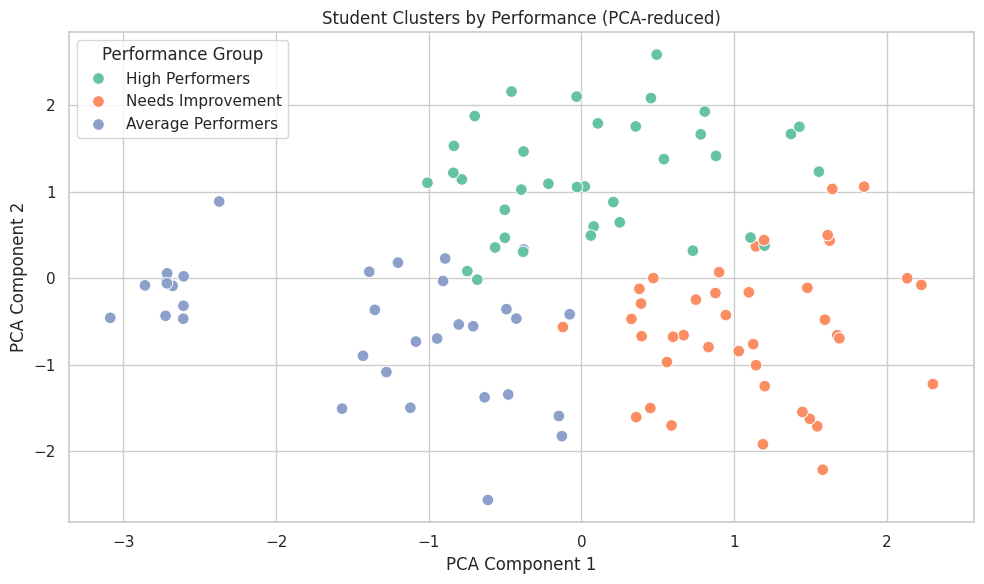

<ipython-input-23-d505028e209a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_counts, x='Performance Group', y='Student Count', palette='Set2')


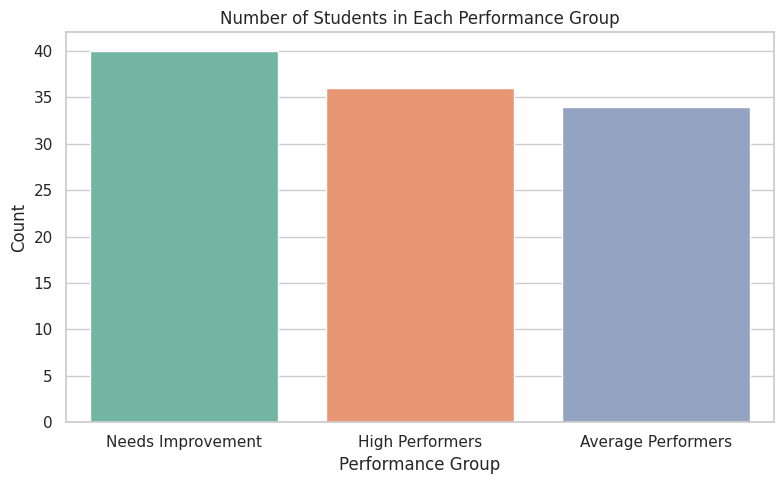

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Optional: Set Seaborn style
sns.set(style="whitegrid")

# Map cluster numbers to labels for clarity in plots
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# PCA to reduce subject dimensions to 2D for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scores_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_Label', palette='Set2', s=70)
plt.title("Student Clusters by Performance (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Performance Group")
plt.tight_layout()
plt.show()

# Bar Plot - Cluster Counts
cluster_counts = df['Cluster_Label'].value_counts().reset_index()
cluster_counts.columns = ['Performance Group', 'Student Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_counts, x='Performance Group', y='Student Count', palette='Set2')
plt.title("Number of Students in Each Performance Group")
plt.ylabel("Count")
plt.xlabel("Performance Group")
plt.tight_layout()
plt.show()
